# Detect place cells

In [1]:
from typing import Tuple

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from param import *
from utils.util import get_place_cell

output_dir = ParamDir().output_dir

## distribution of MI

### Representatives

#### kockout

Text(0.5, 0, 'MI (bits)')

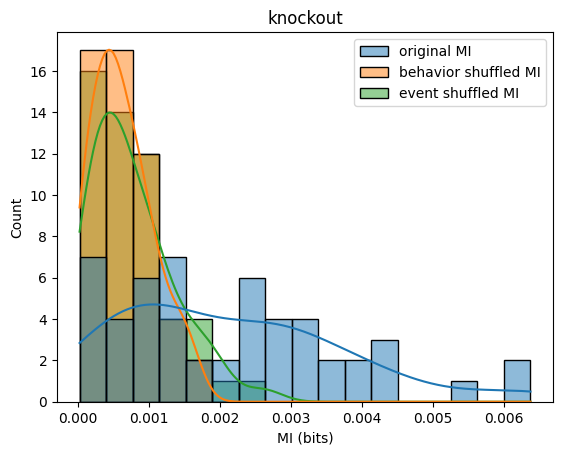

In [2]:
data_dir = ParamDir().data_list[0]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)
fig, ax = plt.subplots()
plot_data = {
    'original MI' : results_all['original MI'], 
    'behavior shuffled MI': results_all['behavior shuffled MI all'][0], 
    'event shuffled MI': results_all['event shuffled MI all'][0]}
sns.histplot(plot_data, ax=ax, kde=True)
plt.title(f"{mouse_type}")
plt.xlabel("MI (bits)")

#### wild-type

Text(0.5, 0, 'MI (bits)')

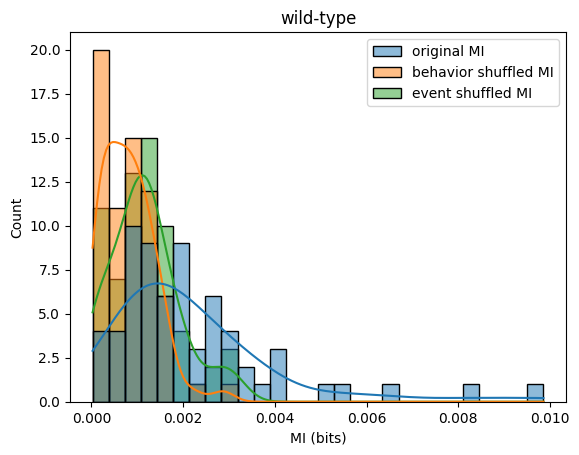

In [3]:
data_dir = ParamDir().data_list[2]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)
fig, ax = plt.subplots()
plot_data = {
    'original MI' :results_all['original MI'], 
    'behavior shuffled MI': results_all['behavior shuffled MI all'][0], 
    'event shuffled MI': results_all['event shuffled MI all'][0]}
sns.histplot(plot_data, ax=ax, kde=True)
plt.title(f"{mouse_type}")
plt.xlabel("MI (bits)")

## Get place cells

### kockout

In [4]:
data_dir = ParamDir().data_list[1]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
print(mouse_type)
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)

pc_beh_id, pc_event_id = get_place_cell(results_all, 0.01)
print(f"behavior shuffled method PC ratio: {len(pc_beh_id)/len(results_all['original MI']) :.2f}")
print(f"event shuffled method PC ratio: {len(pc_event_id)/len(results_all['original MI']) :.2f}")

knockout
behavior shuffled method PC ratio: 0.16
event shuffled method PC ratio: 0.10


### wild-type

In [5]:
data_dir = ParamDir().data_list[2]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
print(mouse_type)
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)

pc_beh_id, pc_event_id = get_place_cell(results_all, 0.01)
print(f"behavior shuffled method PC ratio: {len(pc_beh_id)/len(results_all['original MI']) :.2f}")
print(f"event shuffled method PC ratio: {len(pc_event_id)/len(results_all['original MI']) :.2f}")

wild-type
behavior shuffled method PC ratio: 0.14
event shuffled method PC ratio: 0.12


## All mice place cell ratio boxplot

In [2]:
ratio_list = []
for data_dir in ParamDir().data_list:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"

    with open(output_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)

    pc_beh_id, pc_event_id = get_place_cell(results_all, 0.01)
    num_neuron = len(results_all['original MI'])
    ratio_list.append(
        [
            len(pc_beh_id)/num_neuron, # pc ration for behavior shuffle
            len(pc_event_id)/num_neuron, # pc ratio for event shuffle
            mouse_type
            ])

Text(0, 0.5, 'ratio')

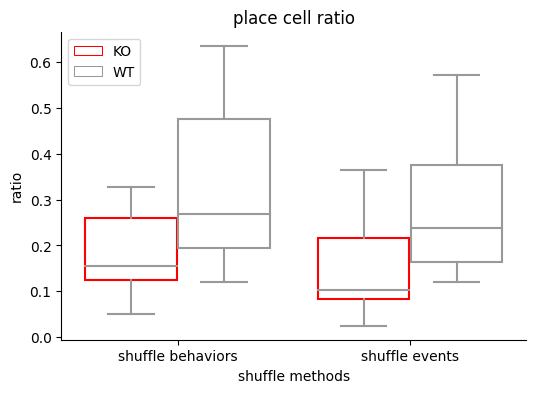

In [35]:
df = pd.DataFrame(ratio_list, columns=["behavior pc ratio", "event pc ratio", "mouse type"])
df1 = df[["behavior pc ratio", "mouse type"]]
df1["pc_ratio"] = ["shuffle behaviors"] * len(df1)
df2 = df[["event pc ratio", "mouse type"]]
df2["pc_ratio"] = ["shuffle events"] * len(df2)
plot_data = pd.DataFrame(np.vstack([df1, df2]), columns = ["place cell ratio", "mouse type","shuffle methods"])

fig, ax = plt.subplots(figsize=(6,4))
sns.despine()

sns.boxplot(plot_data, x = "shuffle methods", y = "place cell ratio", hue="mouse type", 
            ax=ax,
            # boxprops={"facecolor": (0, 0, 0, 0)},
            palette={"KO": "white", "WT": "white"},
            flierprops={"marker": "x"},)

for patch_i in [0, 1, 4]:
    mybox = ax.patches[patch_i]
    mybox.set_edgecolor('red')

ax.legend()
ax.set_title("place cell ratio")
ax.set_ylabel("ratio")